# **Работа с данными студента**

In [1]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from collections import defaultdict
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# проверка каталога
!ls

sample_data


In [6]:
#удаление дубликатов
!rm 10.txt

rm: cannot remove '10.txt': No such file or directory


In [7]:
#загрузка текстов студента в среду
from google.colab import files
uploaded = files.upload()

Saving 10.txt to 10.txt


In [8]:
#объединение  текстов в один массив данных

first = True
with open('stud.txt', 'wt', encoding='utf8') as out:
  all_data = ''.join([open('{}.txt'.format(i), encoding='utf8').read() for i in range(10, 11)])
  for line in all_data.split('\n'):
    print(line)
    if 'next' in line:
                         if not first:
                            line = line.replace('next', '')
                         else:
                            first = False
    out.write(line + '\n')

filename = 'stud.txt'
file = open(filename, 'rt')
text1 = file.read()
file.close()
#print(text1)

#убираем гиперсылки
import re
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

#print(remove_urls(text1))
text=remove_urls(text1)
text2=remove_urls(text1)

#Очистка текста Lowering the case, removing punctuations and numbers

#text_clean = text.replace('-', ' ') #replacing hyphens with whitespace
text_clean = text.replace('.', ' ') #replacing hyphens with whitespace
text_clean = text_clean.replace('’', '') #replacing hyphens with whitespace
text_clean = text_clean.replace(')', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('(', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\n', ' ') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x92', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x94', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x86', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('№', '') #replacing hyphens with whitespace \t «
text_clean = text_clean.replace('–', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\t', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('«', '') #replacing hyphens with whitespace
text_clean = text_clean.replace(':', '') #replacing hyphens with whitespace
text_clean = text_clean.replace(';', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('*', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('•', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('#', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('»', '') #replacing hyphens with whitespace —
text_clean = text_clean.replace('—', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\xa0', ' ') #replacing hyphens with whitespace

table=str.maketrans('','',string.punctuation)
text_clean = text_clean.translate(table)

#removing numbers
text_clean = re.sub(r'\d', '', text_clean)

text_lower = text_clean.lower() #lowercasing
#len(text_lower)


text_lower2=text_lower.split(' ')
text_lower2
#len(text_lower2)



Выходные данные были обрезаны до нескольких последних строк (5000).




 42




   Атли созвал
   дружинников смелых;
   доспехи надев,
   дошли до ограды;
   бросали друг другу
   брань и угрозы:
   «Решили давно мы
   лишить вас жизни!»




 43




   «Не видать, что давно
   вы это решили, —
   вы еще не готовы,
   а воин уж мертв, —
   выбыл один
   из вашего войска!»




 44




   Разъярились, услышав
   речи такие,
   задвигали пальцами,
   схватились за копья,
   их стали метать,
   схоронясь за щитами.




 45




   Вести дошли
   до сидевших в доме,
   громко о схватке
   крикнул слуга им.




 46




   В ярости Гудрун
   ту весть услыхала,
   ожерелья свои
   сорвала и бросила,
   кольца разбила,
   на землю кинув.




 47




   Вышла во двор,
   двери открыв,
   бесстрашно вела себя,
   братьев встречая,
   как подобало,
   приветствуя Нифлунгов
   приветом последним,
   и так им промолвила:




 48




   «Защитить вас хотела,
   не выпустить из дому, —
   кто ж рок пер

['',
 'litru',
 'ru',
 '',
 'электронная',
 'библиотека',
 '',
 'название',
 'книги',
 'старшая',
 'эдда',
 'авторы',
 'эпосы',
 'легенды',
 'и',
 'сказания',
 '',
 '',
 '',
 'жанр',
 'мифы',
 '',
 'легенды',
 '',
 'эпос',
 'адрес',
 'книги',
 '',
 '',
 'аннотация',
 'произведения',
 'героической',
 'поэзии',
 'представленные',
 'в',
 'этом',
 'томе',
 'относятся',
 'к',
 'средневековью',
 '',
 'раннему',
 'англосаксонский',
 'беовульф',
 'и',
 'классическому',
 'исландские',
 'песни',
 'старшей',
 'эдды',
 'и',
 'немецкая',
 'песнь',
 'о',
 'нибелунгах',
 '',
 '',
 'вступительная',
 'статья',
 'а',
 'гуревича',
 'перевод',
 'в',
 'тихомирова',
 'а',
 'корсуна',
 'ю',
 'корнеева',
 'примечания',
 'о',
 'смирницкой',
 'м',
 'стеблинкаменского',
 'и',
 'а',
 'гуревича',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'старшая',
 'эдда',
 '',
 '',
 '',
 '',
 'а',
 '',
 'гуревич',
 '',
 'старшая',
 'эдда',
 '',
 '',
 '',
 'песня',
 'о',
 'богах',
 'и',
 'героях',
 'условно',
 'объединяемые',
 'названи

In [9]:
#Токенизация текста
spec_chars = string.punctuation + '\n\xa0«»\t'
text_test = " ".join([ch for ch in text_lower2 if ch not in spec_chars])
#text_test

text_tokens = word_tokenize(text_test)
#text_tokens
#from nltk import word_tokenize
#nltk.download('punkt')
#sentences = [word.lower() for word in text_lower2 if re.match('^[а-яА-ЯёЁ]+', word)]


dftt = pd.DataFrame(text_tokens, columns=['Words'])
dftt = dftt.dropna(subset=['Words'])
#dftt
sentences=dftt['Words'].values.tolist()
text_tokens

['litru',
 'ru',
 'электронная',
 'библиотека',
 'название',
 'книги',
 'старшая',
 'эдда',
 'авторы',
 'эпосы',
 'легенды',
 'и',
 'сказания',
 'жанр',
 'мифы',
 'легенды',
 'эпос',
 'адрес',
 'книги',
 'аннотация',
 'произведения',
 'героической',
 'поэзии',
 'представленные',
 'в',
 'этом',
 'томе',
 'относятся',
 'к',
 'средневековью',
 'раннему',
 'англосаксонский',
 'беовульф',
 'и',
 'классическому',
 'исландские',
 'песни',
 'старшей',
 'эдды',
 'и',
 'немецкая',
 'песнь',
 'о',
 'нибелунгах',
 'вступительная',
 'статья',
 'а',
 'гуревича',
 'перевод',
 'в',
 'тихомирова',
 'а',
 'корсуна',
 'ю',
 'корнеева',
 'примечания',
 'о',
 'смирницкой',
 'м',
 'стеблинкаменского',
 'и',
 'а',
 'гуревича',
 'старшая',
 'эдда',
 'а',
 'гуревич',
 'старшая',
 'эдда',
 'песня',
 'о',
 'богах',
 'и',
 'героях',
 'условно',
 'объединяемые',
 'названием',
 'старшая',
 'эдда',
 'название',
 'эдда',
 'было',
 'дано',
 'в',
 'xvii',
 'веке',
 'первым',
 'исследователем',
 'рукописи',
 'который',


In [10]:
from google.colab import files
with pd.ExcelWriter('allstudentWords.xlsx') as writer:
    dftt.to_excel(writer, sheet_name='stud')
files.download('allstudentWords.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Лемматизация данных

In [11]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 50.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=a8c519a779be3afd1105277eb2e39a8d44debe814af9920f397ee9212e8a179b
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [13]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

words = sentences
normal_text=[]
for word in words:
    p = morph.parse(word)[0]
    normal_text.append(p.normal_form)
    #print(p.normal_form)
normal_text

['litru',
 'ru',
 'электронный',
 'библиотека',
 'название',
 'книга',
 'старший',
 'эдда',
 'автор',
 'эпос',
 'легенда',
 'и',
 'сказание',
 'жанр',
 'миф',
 'легенда',
 'эпос',
 'адрес',
 'книга',
 'аннотация',
 'произведение',
 'героический',
 'поэзия',
 'представить',
 'в',
 'это',
 'том',
 'относиться',
 'к',
 'средневековье',
 'ранний',
 'англосаксонский',
 'беовульф',
 'и',
 'классический',
 'исландский',
 'песня',
 'старший',
 'эдда',
 'и',
 'немецкий',
 'песня',
 'о',
 'нибелунг',
 'вступительный',
 'статья',
 'а',
 'гуревич',
 'перевод',
 'в',
 'тихомиров',
 'а',
 'корсуна',
 'ю',
 'корнеев',
 'примечание',
 'о',
 'смирницкий',
 'м',
 'стеблинкаменский',
 'и',
 'а',
 'гуревич',
 'старший',
 'эдда',
 'а',
 'гуревич',
 'старший',
 'эдда',
 'песня',
 'о',
 'бог',
 'и',
 'герой',
 'условно',
 'объединять',
 'название',
 'старший',
 'эдда',
 'название',
 'эдда',
 'быть',
 'дать',
 'в',
 'xvii',
 'век',
 'первый',
 'исследователь',
 'рукопись',
 'который',
 'перенести',
 'на',
 'о

In [14]:
#Очистка данных от стоп-слов

#убираем все лишние слова

shortest_word_len = 2

result = [s for s in normal_text if len(s) > shortest_word_len]
text_lower2=result
map11 = []
map22 = []
a_to_m = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n', 'o','p','q','r','s','t','u','v','w','x','y','z', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
#a_to_m = ['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
for words in text_lower2:
    if words[0][0] in a_to_m:
        map11.append(words)
    else:
        map22.append(words)
text_lower2=map11
#len(text_lower2)

text_lower=" ".join(map(str, text_lower2))
#len(text_lower)

#Data Partition
#Seperating the first 5000 lines and next in two seperate data frames

text1 = text_lower[:5000]
text2 = text_lower[5000:]

#Mapper
#Mapper 1
def mapper1(data):
    words = re.split(r'\W+', data)
    for word in words:
        yield(word, 1)

#Mapper 2
def mapper2(data):
    words = re.split(r'\W+', data)
    for word in words:
        yield(word, 1)

#Making lists of the seperate data

# Подготовка данных к частотной токенизации, разбиение данных на равное количество символов

Mapping words from first 5000 lines using mapper 1 in list 1

In [15]:
list1 = []
for x in mapper1(text1):
    list1.append(x)

Mapping words from rest of the lines using mapper 2 in list 2

In [16]:
list2 = []
for x in mapper2(text2):
    list2.append(x)

In [17]:
print(list1)

[('litru', 1), ('электронный', 1), ('библиотека', 1), ('название', 1), ('книга', 1), ('старший', 1), ('эдда', 1), ('автор', 1), ('эпос', 1), ('легенда', 1), ('сказание', 1), ('жанр', 1), ('миф', 1), ('легенда', 1), ('эпос', 1), ('адрес', 1), ('книга', 1), ('аннотация', 1), ('произведение', 1), ('героический', 1), ('поэзия', 1), ('представить', 1), ('это', 1), ('том', 1), ('относиться', 1), ('средневековье', 1), ('ранний', 1), ('англосаксонский', 1), ('беовульф', 1), ('классический', 1), ('исландский', 1), ('песня', 1), ('старший', 1), ('эдда', 1), ('немецкий', 1), ('песня', 1), ('нибелунг', 1), ('вступительный', 1), ('статья', 1), ('гуревич', 1), ('перевод', 1), ('тихомиров', 1), ('корсуна', 1), ('корнеев', 1), ('примечание', 1), ('смирницкий', 1), ('стеблинкаменский', 1), ('гуревич', 1), ('старший', 1), ('эдда', 1), ('гуревич', 1), ('старший', 1), ('эдда', 1), ('песня', 1), ('бог', 1), ('герой', 1), ('условно', 1), ('объединять', 1), ('название', 1), ('старший', 1), ('эдда', 1), ('наз

In [18]:
print(list2)

[('ак', 1), ('каждый', 1), ('имя', 1), ('память', 1), ('связываться', 1), ('определённый', 1), ('эпизод', 1), ('миф', 1), ('или', 1), ('героический', 1), ('эпопея', 1), ('это', 1), ('имя', 1), ('служить', 1), ('как', 1), ('знак', 1), ('который', 1), ('обычно', 1), ('нетрудно', 1), ('быть', 1), ('расшифровать', 1), ('для', 1), ('понимание', 1), ('тот', 1), ('или', 1), ('иной', 1), ('имя', 1), ('специалист', 1), ('вынудить', 1), ('обращаться', 1), ('справочник', 1), ('память', 1), ('средневековый', 1), ('исландец', 1), ('более', 1), ('ёмкий', 1), ('активный', 1), ('чем', 1), ('наш', 1), ('сила', 1), ('тот', 1), ('что', 1), ('приходиться', 1), ('полагаться', 1), ('только', 1), ('она', 1), ('без', 1), ('затруднение', 1), ('выдавать', 1), ('нужный', 1), ('информация', 1), ('при', 1), ('встреча', 1), ('это', 1), ('имя', 1), ('сознание', 1), ('развёртываться', 1), ('весь', 1), ('относиться', 1), ('рассказ', 1), ('иной', 1), ('слово', 1), ('сжатый', 1), ('сравнительно', 1), ('немногословный', 

Merging the two lists

In [19]:
final_list = list1+list2

# Sorting

Sorting the list alphabetically in ascending order

In [20]:
final_list.sort()

In [21]:
len(final_list)

31564

In [22]:
final_list[0]

('dom', 1)

In [23]:
del final_list[0]

# Partition of data before sending to reducer

Storing elements in final_list into two different lists: a-m in map1 and n-z in map2


In [24]:
#storing elements in final_list into two different lists: a-m in map1 and n-z in map2
map1 = []
map2 = []
a_to_m = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n', 'o','p','q','r','s','t','u','v','w','x','y','z', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
#a_to_m = ['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
for words in final_list:
    if words[0][0] in a_to_m:
        map1.append(words)
    else:
        map2.append(words)

In [25]:
len(map1)

31563

In [26]:
len(map2)

0

In [27]:
print(map1)

[('domr', 1), ('ixxi', 1), ('litru', 1), ('top', 1), ('typc', 1), ('xii', 1), ('xiii', 1), ('xiii', 1), ('xiii', 1), ('xiii', 1), ('xiii', 1), ('xvii', 1), ('август', 1), ('автор', 1), ('автор', 1), ('автор', 1), ('автор', 1), ('агнар', 1), ('агнара', 1), ('агнара', 1), ('агнары', 1), ('агнары', 1), ('агнары', 1), ('агнары', 1), ('агнары', 1), ('агнары', 1), ('агнары', 1), ('адаль', 1), ('адрес', 1), ('ак', 1), ('активный', 1), ('ала', 1), ('алев', 1), ('алеть', 1), ('али', 1), ('алкать', 1), ('алтарь', 1), ('алтарь', 1), ('алтарь', 1), ('альва', 1), ('альва', 1), ('альва', 1), ('альва', 1), ('альва', 1), ('альва', 1), ('альва', 1), ('альва', 1), ('альва', 1), ('альва', 1), ('альва', 1), ('альва', 1), ('альва', 1), ('альва', 1), ('альва', 1), ('альва', 1), ('альва', 1), ('альва', 1), ('альвальдь', 1), ('альвис', 1), ('альвиснуть', 1), ('альвиснуть', 1), ('альвиснуть', 1), ('альвиснуть', 1), ('альвиснуть', 1), ('альвиснуть', 1), ('альвиснуть', 1), ('альвиснуть', 1), ('альвиснуть', 1), (

In [28]:
print(map2)

[]


# Reducer

Defining the reducer function

In [29]:
def reducer(word, counts):
    yield(word, sum(counts))

Reducer 1          
Preparing and feeding the data into the reducer function

In [30]:
def reduce1(data):
    text = defaultdict(list)
    for word, count in data:
        text[word].append(count)
    return[output
          for word, counts in text.items()
          for output in reducer(word, counts)]

Reducer2  
Preparing and feeding the data into the reducer function

In [31]:
def reduce2(data):
    text = defaultdict(list)
    for word, count in data:
        text[word].append(count)
    return[output
          for word, counts in text.items()
          for output in reducer(word, counts)]

Reducing the first a-m list

In [32]:
list3 = reduce1(map1)

Reducing the second n-z list

In [33]:
list4 = reduce2(map2)

Merging the two reduced lists

In [34]:
answer_list = list3 + list4
print(answer_list)

[('domr', 1), ('ixxi', 1), ('litru', 1), ('top', 1), ('typc', 1), ('xii', 1), ('xiii', 5), ('xvii', 1), ('август', 1), ('автор', 4), ('агнар', 1), ('агнара', 2), ('агнары', 7), ('адаль', 1), ('адрес', 1), ('ак', 1), ('активный', 1), ('ала', 1), ('алев', 1), ('алеть', 1), ('али', 1), ('алкать', 1), ('алтарь', 3), ('альва', 18), ('альвальдь', 1), ('альвис', 1), ('альвиснуть', 31), ('альвов', 23), ('альвовкарлик', 1), ('альврёдуль', 1), ('альвхейм', 1), ('альвхильда', 1), ('альгрить', 1), ('альмвейг', 1), ('альрека', 1), ('альсвинна', 1), ('альсвинный', 1), ('альтиов', 1), ('альфёдрый', 1), ('алёва', 2), ('ама', 1), ('амбот', 1), ('анар', 1), ('ангантюр', 1), ('ангантюра', 19), ('ангантюря', 1), ('ангейя', 1), ('англов', 1), ('англосаксонский', 6), ('ангрбод', 1), ('андваря', 12), ('андхримнир', 1), ('ани', 1), ('аннотация', 1), ('анонимный', 1), ('антиквар', 1), ('античность', 1), ('антропоморфность', 1), ('апатия', 1), ('арвак', 2), ('арви', 1), ('ариннево', 1), ('арнгрим', 1), ('арфа',

# Final Dataframe

In [35]:
df = pd.DataFrame(answer_list, columns=['Word', 'Frequency'])
df

,Word,Frequency
0,domr,1
1,ixxi,1
2,litru,1
3,top,1
4,typc,1
...,...,...
5709,ёрмунрекка,10
5710,ёссурский,2
5711,ёсурмара,1
5712,ётун,39


In [36]:
print(df.to_string())

                       Word  Frequency
0                      domr          1
1                      ixxi          1
2                     litru          1
3                       top          1
4                      typc          1
5                       xii          1
6                      xiii          5
7                      xvii          1
8                    август          1
9                     автор          4
10                    агнар          1
11                   агнара          2
12                   агнары          7
13                    адаль          1
14                    адрес          1
15                       ак          1
16                 активный          1
17                      ала          1
18                     алев          1
19                    алеть          1
20                      али          1
21                   алкать          1
22                   алтарь          3
23                    альва         18
24                альваль

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714 entries, 0 to 5713
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       5714 non-null   object
 1   Frequency  5714 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.4+ KB


In [38]:
df1=df[['Word','Frequency']].sort_values(ascending=False,by='Frequency')
df1

,Word,Frequency
4323,сказать,697
311,быть,619
2749,они,443
5544,что,407
2748,она,274
...,...,...
2599,облить,1
2601,обломок,1
2602,облыжно,1
2604,обманный,1


# EN

In [39]:
!rm stop-words_en.xlsx

rm: cannot remove 'stop-words_en.xlsx': No such file or directory


In [40]:
#убираем слова-стоп загружаем слова-стоп и сравниваем с корпусом
from google.colab import files
uploaded = files.upload()

Saving stop-words_en.xlsx to stop-words_en.xlsx


In [41]:
df_stop= pd.read_excel("stop-words_en.xlsx")
df_stop
#print(df_teach)
print(df_stop.count())

Unnamed: 0    179
0             179
dtype: int64


In [42]:
df_stop= pd.read_excel("stop-words_en.xlsx")
df_stop
df_stop.rename(columns={0: 'stop_en'}, inplace=True)
print(df_stop.count())
#убираем слова-стоп
df_student=df1.copy()
df_student_clear=df_student[~df_student.Word.isin(df_stop.stop_en)].reset_index(drop=True)
df_student_clear.rename(columns = {'Word':'WordStudent_11'}, inplace = True)
print(df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True))
print(df_student_clear.count())
df_student_clear2=df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True)


#df2=df1[df1['Word'].map(len) > 3]

Unnamed: 0    179
stop_en       179
dtype: int64
     WordStudent_11  Frequency
0           сказать        697
1              быть        619
2               они        443
3               что        407
4               она        274
...             ...        ...
5709        содрать          1
5710   содрогнуться          1
5711      соединить          1
5712    соединиться          1
5713        отирать          1

[5714 rows x 2 columns]
WordStudent_11    5714
Frequency         5714
dtype: int64


# RU

In [43]:
from google.colab import files
uploaded = files.upload()

Saving stop-words-ru.xlsx to stop-words-ru.xlsx


In [44]:
df_stop= pd.read_excel("stop-words-ru.xlsx")
df_stop
df_stop.rename(columns={0: 'stop_ru'}, inplace=True)
print(df_stop.count())

Unnamed: 0    151
stop_ru       151
dtype: int64


In [45]:
df_student=df_student_clear2
# df_student_clear=df_student[~df_student.WordStudent_5.isin(df_stop.stop_ru)].reset_index(drop=True)
df_student_clear.rename(columns = {'Word':'WordStudent_1'}, inplace = True)
print(df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True))
print(df_student_clear.count())
df_student_clear2=df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True)

     WordStudent_11  Frequency
0           сказать        697
1              быть        619
2               они        443
3               что        407
4               она        274
...             ...        ...
5709        содрать          1
5710   содрогнуться          1
5711      соединить          1
5712    соединиться          1
5713        отирать          1

[5714 rows x 2 columns]
WordStudent_11    5714
Frequency         5714
dtype: int64


# PLOT

<ipython-input-46-c2de94caeb8c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=df_student_clear2.head(50)['WordStudent_11'],rotation=75)


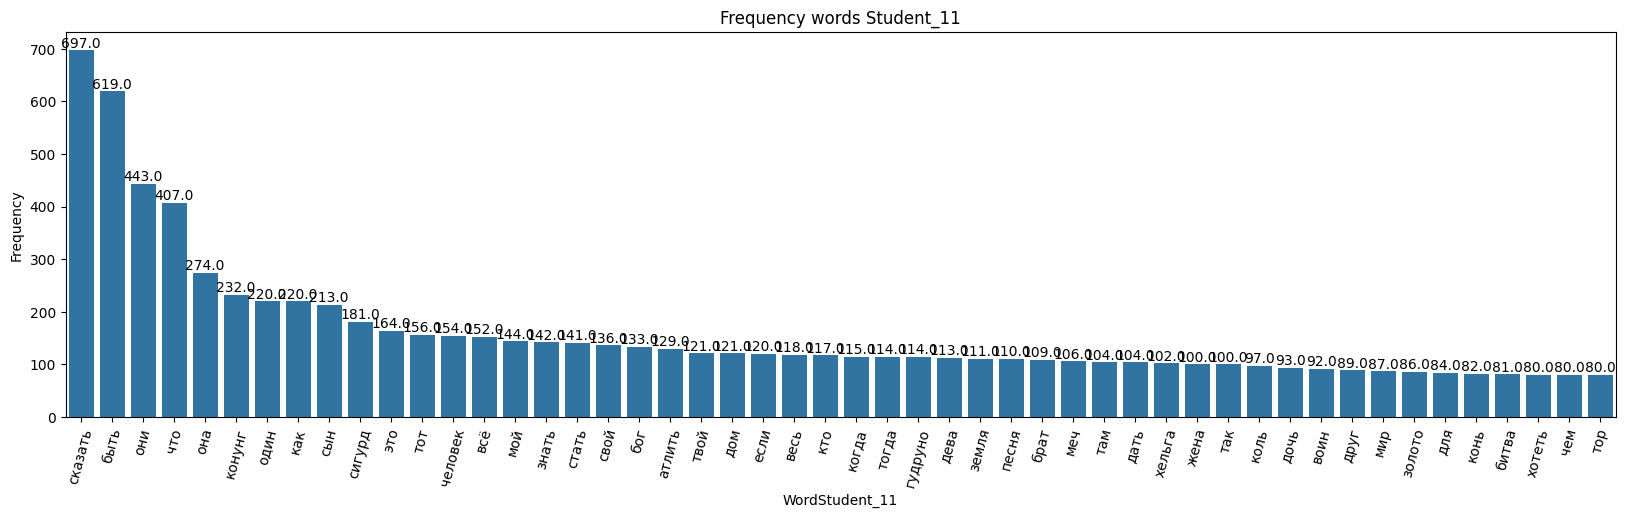

In [46]:
#Plotting the top 5 films by revenue
#setting the figure size
plt.figure(figsize=(20,5))
#creating a bar plot
ax=sns.barplot(x='WordStudent_11',y='Frequency',data=df_student_clear2.head(50))
#rotating the x axis labels
ax.set_xticklabels(labels=df_student_clear2.head(50)['WordStudent_11'],rotation=75)
#setting the title
ax.set_title("Frequency words Student_11")
#setting the Y-axis labels
ax.set_ylabel("Frequency")
#Labelling the bars in the bar graph
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

In [47]:
from google.colab import files
with pd.ExcelWriter('outputStudents.xlsx') as writer:
    df_student_clear2.to_excel(writer, sheet_name='outputStudent_11')
files.download('outputStudents.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
!ls

10.txt		      outputStudents.xlsx  stop-words_en.xlsx  stud.txt
allstudentWords.xlsx  sample_data	   stop-words-ru.xlsx


# **Частотный анализ слов студента в корпусе текстов преподавателя**

In [49]:
!rm Analise_Осокин.xlsx

rm: cannot remove 'Analise_Осокин.xlsx': No such file or directory


In [50]:
from google.colab import files
uploaded = files.upload()

Saving outputTeacherW_Reduce.xlsx to outputTeacherW_Reduce.xlsx


In [51]:
df_teach = pd.read_excel("outputTeacherW_Reduce.xlsx", 'TeacerWords')
# df_teach
# print(df_teach)
print(df_teach.count())

Unnamed: 0       5592
KorpusBosenko    5592
Frequency        5592
dtype: int64


In [52]:
df_stud = pd.read_excel("outputStudents.xlsx", 'outputStudent_11')
#print(df_stud)
print(df_stud.count())

Unnamed: 0        5714
WordStudent_11    5714
Frequency         5714
dtype: int64


In [53]:
#частота совпадений студента c корпусом данных
df_work=df_stud.copy()
df_student_ok=df_work[df_work.WordStudent_11.isin(df_teach.KorpusBosenko)].reset_index(drop=True)
df_student_ok.rename(columns = {'WordStudent_11':'WordSt_11Tch'}, inplace = True)
df_student_ok.rename(columns = {'Frequency':'FrSt_11'}, inplace = True)
print(df_student_ok.sort_values(by ='WordSt_11Tch', ascending = 0).reset_index(drop=True))
print(df_student_ok.count())

      Unnamed: 0 WordSt_11Tch  FrSt_11
0           1021     ётунхейм        5
1            122         ётун       39
2           4670     ёсурмара        1
3           2842    ёссурский        2
4            613   ёрмунрекка       10
...          ...          ...      ...
5565        3289        адаль        1
5566         776       агнары        7
5567        2794       агнара        2
5568        3297        агнар        1
5569        1344        автор        4

[5570 rows x 3 columns]
Unnamed: 0      5570
WordSt_11Tch    5570
FrSt_11         5570
dtype: int64


In [54]:
#частота совпадений преподавателя c  словами студента- для определения частоты встречаемости слов у преподавателя, которые использовал студент
df_work2=df_teach.copy()
df_teach_ok=df_work2[df_work2.KorpusBosenko.isin(df_stud.WordStudent_11)].reset_index(drop=True)
df_teach_ok.rename(columns = {'KorpusBosenko':'WordSt_11Tch'}, inplace = True)
df_teach_ok.rename(columns = {'Frequency':'FrTch'}, inplace = True)
#df_teach_ok.pop('Unnamed: 0')
print(df_teach_ok.sort_values(by ='WordSt_11Tch', ascending = 0).reset_index(drop=True))
print(df_teach_ok.count())

      Unnamed: 0 WordSt_11Tch  FrTch
0           1005     ётунхейм      5
1             95         ётун     39
2           4553     ёсурмара      1
3           1973    ёссурский      2
4            547   ёрмунрекка     10
...          ...          ...    ...
5565        4554        адаль      1
5566         769       агнары      7
5567        2304       агнара      2
5568        3525        агнар      1
5569        1192        автор      4

[5570 rows x 3 columns]
Unnamed: 0      5570
WordSt_11Tch    5570
FrTch           5570
dtype: int64


In [55]:
df_teach_ok_1=df_teach_ok
df_teach_ok_1.drop('Unnamed: 0', axis= 1 , inplace= True )
df_teach_ok_1

,WordSt_11Tch,FrTch
0,сказать,697
1,конунг,234
2,сын,213
3,сигурд,182
4,это,165
...,...,...
5565,спокойно,1
5566,шумный,1
5567,специфика,1
5568,вертел,1


In [56]:
df_student_ok_1=df_student_ok
df_student_ok_1.drop('Unnamed: 0', axis= 1 , inplace= True )
df_student_ok_1

,WordSt_11Tch,FrSt_11
0,сказать,697
1,конунг,232
2,сын,213
3,сигурд,181
4,это,164
...,...,...
5565,содрать,1
5566,содрогнуться,1
5567,соединить,1
5568,соединиться,1


In [57]:
#Объединяем частоты студента и преподавателя
res = df_teach_ok.merge(df_student_ok)
res

,WordSt_11Tch,FrTch,FrSt_11
0,сказать,697,697
1,конунг,234,232
2,сын,213,213
3,сигурд,182,181
4,это,165,164
...,...,...,...
5565,спокойно,1,1
5566,шумный,1,1
5567,специфика,1,1
5568,вертел,1,1


In [58]:
#Объединяем частоты студента и преподавателя
res = df_student_ok.merge(df_teach_ok)
res

,WordSt_11Tch,FrSt_11,FrTch
0,сказать,697,697
1,конунг,232,234
2,сын,213,213
3,сигурд,181,182
4,это,164,165
...,...,...,...
5565,содрать,1,1
5566,содрогнуться,1,1
5567,соединить,1,1
5568,соединиться,1,1


In [59]:
from google.colab import files
with pd.ExcelWriter('rezult.xlsx') as writer:
    res.to_excel(writer, sheet_name='res')
files.download('rezult.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
x=res['WordSt_11Tch'].values.tolist()

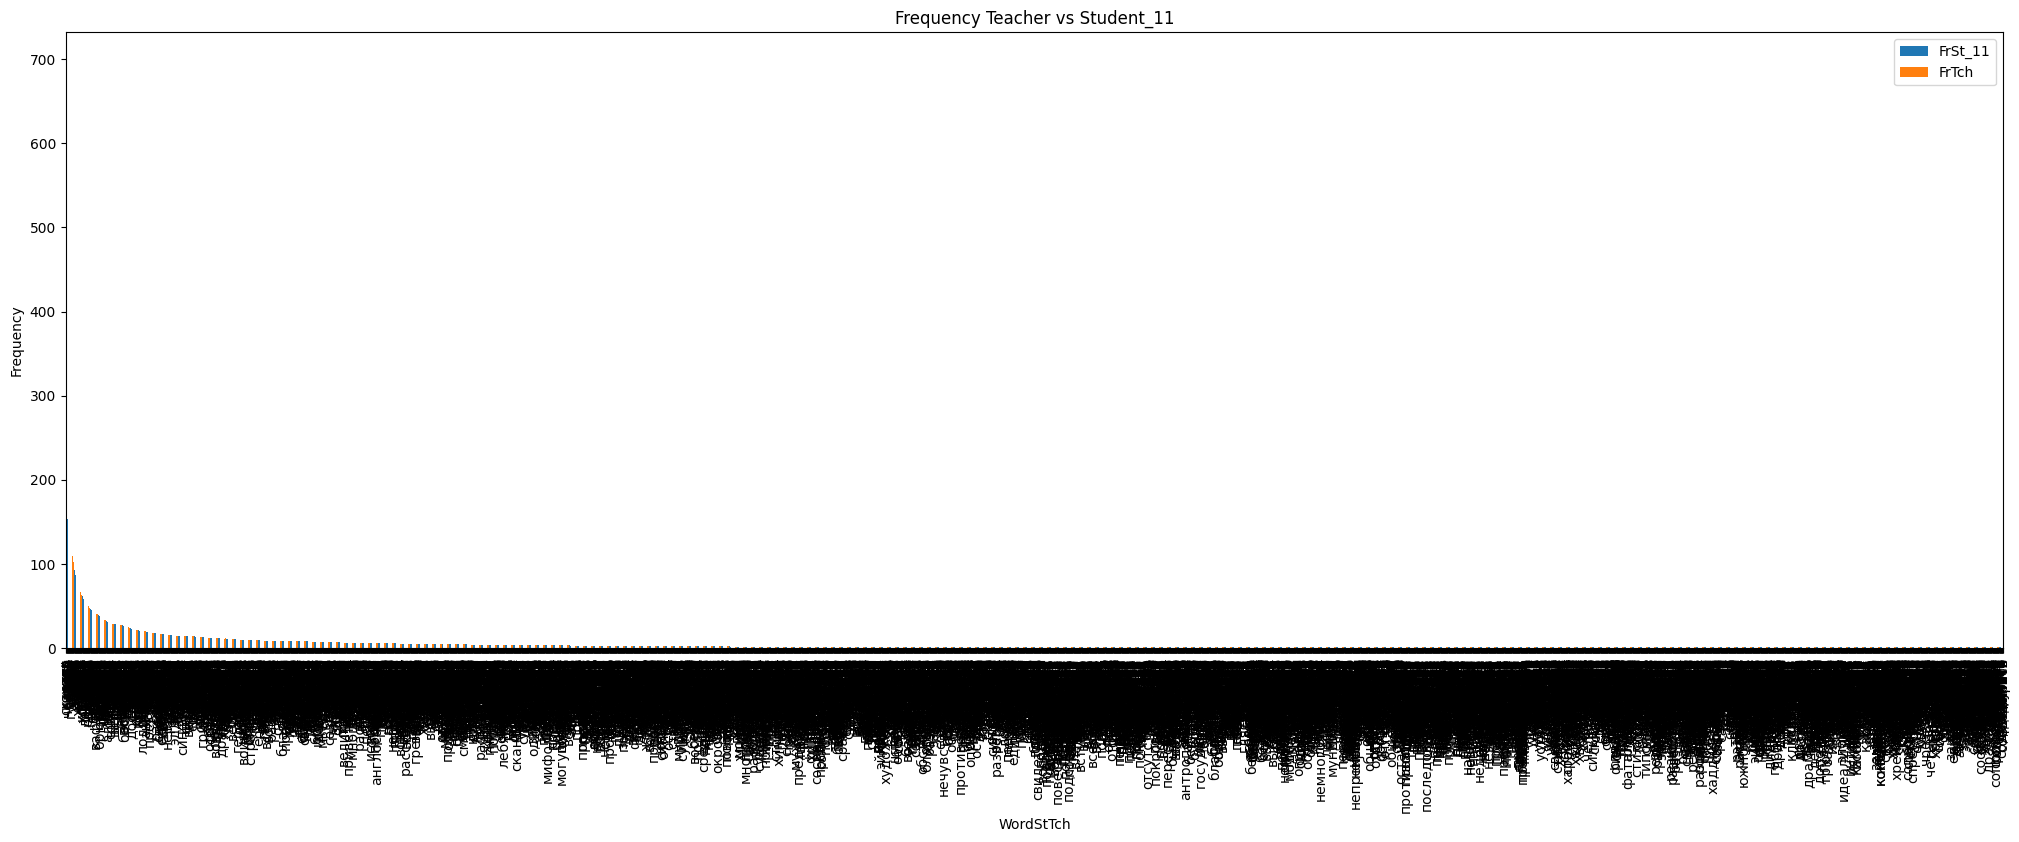

In [62]:
res.plot(kind='bar', figsize=(25,8))
x_pos = [i for i, _ in enumerate(x)]
plt.xlabel("WordStTch")
plt.ylabel("Frequency")
plt.title("Frequency Teacher vs Student_11")
plt.xticks(x_pos, x)
plt.show()

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

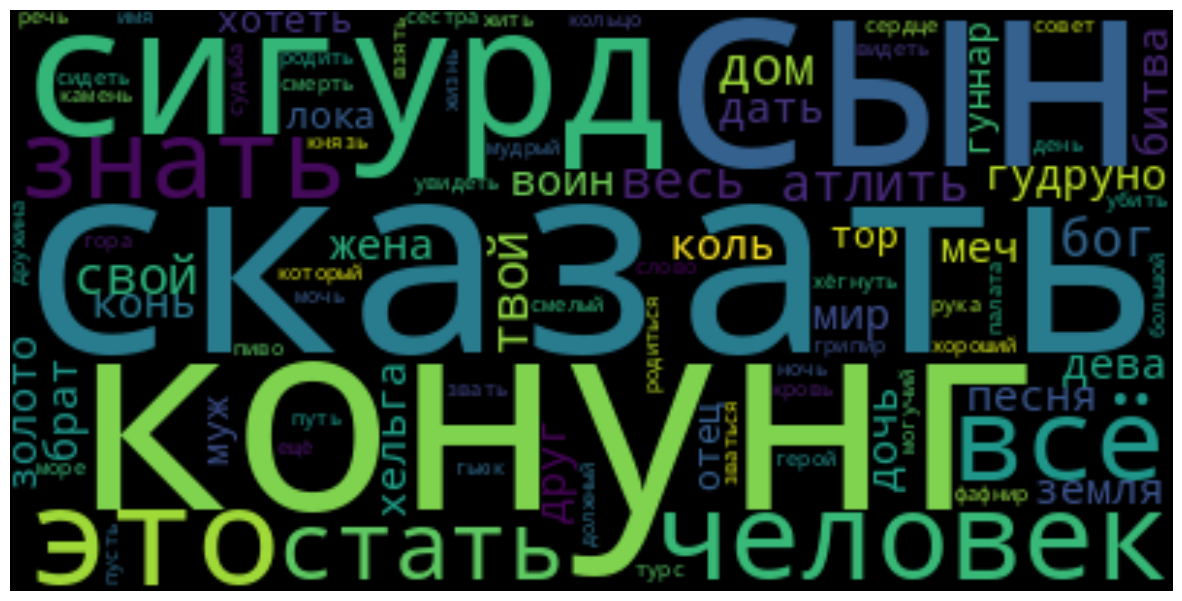

In [64]:
viz=res['WordSt_11Tch'].values.tolist()
text_raw = " ".join(viz)
wordcloud = WordCloud().generate(text_raw)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")